In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada

Longitud L en m, Ancho en m, Altura H en m, Densidad de la roca gr/cm3

In [3]:
L=20 #m
A=10 #m
H=6.5 #m

DRoca=4 #gr/cm^3
Vs=2500 #m/s

DiaBarreno=76.2 #mm
DCarga=0.85 #gr/cm^3
Vdet=2000 #m/s

ValorKgAnfo=7100 

In [11]:
Fe=(DCarga*Vdet**2/(1.3*3660**2))**0.33
Fr=(2.7*3500/(DRoca*Vs))**0.33
f=Fe*Fr
B=0.76*DiaBarreno*f/25.4
if DiaBarreno<165:
    B=B*0.9
S=1.15*B
print(S,B)

T=DiaBarreno*35*0.7/1000
J=0.3*B
Lf=0.6*B
print(T,J)

1.3510048670980144 1.1747868409547952
1.8668999999999998 0.35243605228643854


In [12]:
Bancox=[0,L,L,0,0]
Bancoy=[0,0,A,A,0]

x1=int(L/S)
if (L-(x1-1)*S)/2<=2*S/3:x2=x1-1
else:x2=x1+1
if int(A/B)%2==0:y1=int(A/B/2)
else:y1=int(A/B/2)+1
y2=int(A/B/2)

Mallax1=np.zeros(x1)
Mallax2=np.zeros(x2)
Mallay1=np.zeros(y1)
Mallay2=np.zeros(y2)

for i in range(x1):
    Mallax1[i]=S*i+(L-(x1-1)*S)/2
for i in range(x2):
    Mallax2[i]=Mallax1[0]+S*i+S/2*(x1-x2)
for i in range(y1):
    Mallay1[i]=2*B*i+(A-(int(A/B)-1)*B)/2
for i in range(y2):
    Mallay2[i]=Mallay1[0]+2*B*i+B

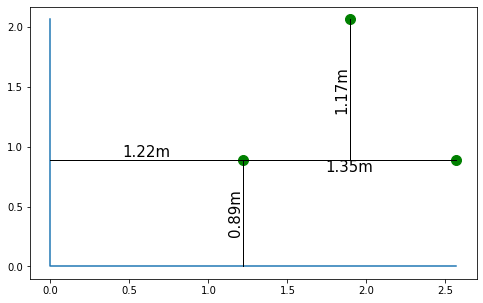

In [13]:
plt.figure(figsize=(8,5))  
plt.plot([0,0,Mallax1[1]],[Mallay2[0],0,0])
plt.plot(Mallax1[0],Mallay1[0],'go',ms=10)
plt.plot(Mallax1[1],Mallay1[0],'go',ms=10)
plt.plot(Mallax1[0]+S/2,Mallay1[0]+B,'go',ms=10)
plt.plot([Mallax1[0],Mallax1[0]],[0,Mallay1[0]],'k',linewidth=1)
plt.plot([Mallax1[0]+S/2,Mallax1[0]+S/2],[Mallay1[0],Mallay2[0]],'k',linewidth=1)
plt.plot([0,Mallax1[1]],[Mallay1[0],Mallay1[0]],'k',linewidth=1)
plt.text(Mallax1[0],Mallay1[0]/2,str(round(Mallay1[0],2))+'m',rotation=90,ha='right',va='center',size=15)
plt.text(Mallax1[0]/2,Mallay1[0],str(round(Mallax1[0],2))+'m',ha='center',va='bottom',size=15)
plt.text(Mallax1[0]+S/2,Mallay1[0],str(round(S,2))+'m',ha='center',va='top',size=15)
plt.text(Mallax1[0]+S/2,(Mallay2[0]+Mallay1[0])/2,str(round(B,2))+'m',rotation=90,ha='right',va='center',size=15)
plt.show()

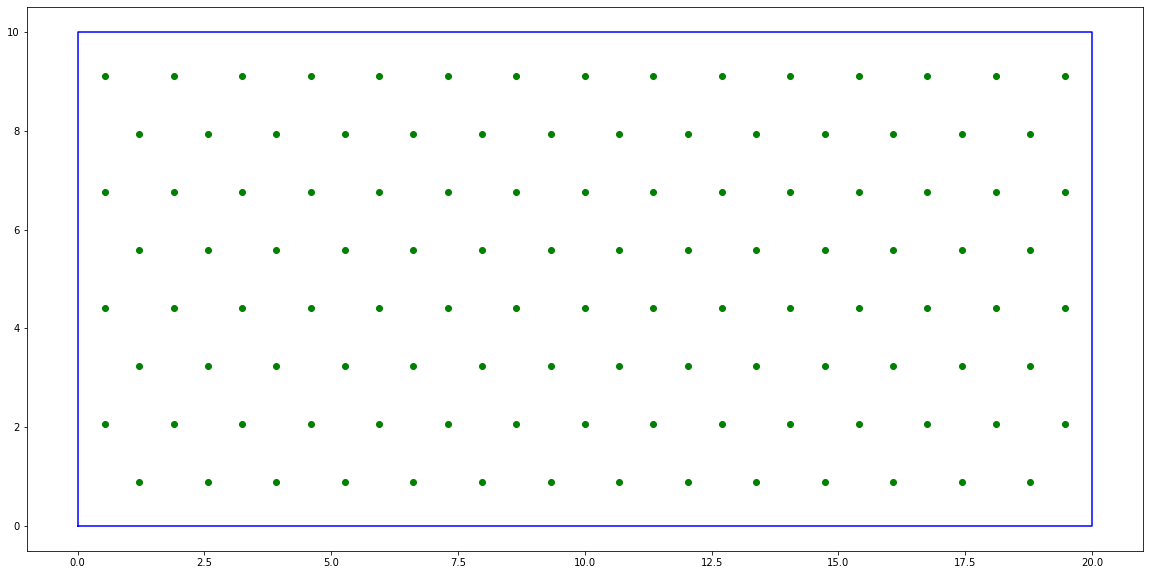

In [14]:
plt.figure(figsize=(L,A))
plt.plot(Bancox,Bancoy,'b')
for i in range(x1):
    for j in range(y1):
        plt.plot(Mallax1[i],Mallay1[j],'go')
for i in range(x2):
    for j in range(y2):
        plt.plot(Mallax2[i],Mallay2[j],'go')

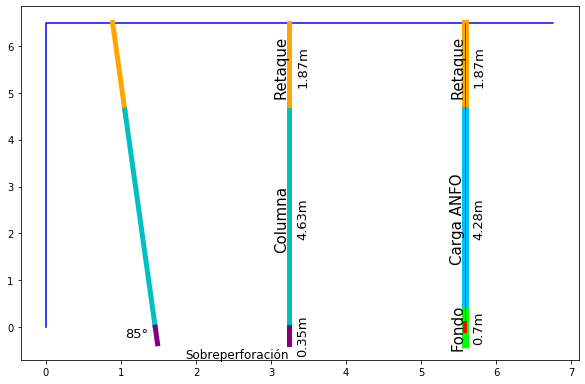

In [15]:
plt.figure(figsize=(A,H))
plt.plot([0,0,Mallay1[0]+B*5],[0,H,H],'b')
ang1=85
ang=np.radians(ang1)

plt.plot([Mallay1[0],abs((H-T)-H)/np.tan(ang)+Mallay1[0]],[H,H-T],'orange',linewidth=5)
plt.plot([abs((H-T)-H)/np.tan(ang)+Mallay1[0],Mallay1[0]+H/np.tan(ang)],[H-T,0],'c',linewidth=5)
plt.plot([Mallay1[0]+H/np.tan(ang),Mallay1[0]+H/np.tan(ang)+J/np.tan(ang)],[0,-J],'purple',linewidth=5)

plt.plot([Mallay1[1],Mallay1[1]],[H,H-T],'orange',linewidth=5)
plt.plot([Mallay1[1],Mallay1[1]],[H-T,0],'c',linewidth=5)
plt.plot([Mallay1[1],Mallay1[1]],[0,-J],'purple',linewidth=5)

plt.plot([Mallay1[2],Mallay1[2]],[H,H-T],'orange',linewidth=7)
plt.plot([Mallay1[2],Mallay1[2]],[H-T,Lf-J],'deepskyblue',linewidth=7)
plt.plot([Mallay1[2],Mallay1[2]],[Lf-J,-J],'lime',linewidth=7)
plt.plot([Mallay1[2],Mallay1[2]],[H,0],'red',linewidth=1)
plt.plot([Mallay1[2],Mallay1[2]],[.09,-.09],'red',linewidth=4)


plt.text(Mallay1[0]+H/np.tan(ang)-.1,0,str(ang1)+'°',ha='right',va='top',size=13)

plt.text(Mallay1[1],H-T/2,'Retaque',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[1]+.1,H-T/2,str(round(T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[1],(H-T)/2,'Columna',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[1]+.1,(H-T)/2,str(round(H-T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[1]+.1,-J/2,str(round(J,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[1],-J-.1,'Sobreperforación',ha='right',va='top',size=12)

plt.text(Mallay1[2],H-T/2,'Retaque',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[2]+.1,H-T/2,str(round(T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[2],(H-T)/2,'Carga ANFO',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[2]+.1,(H-T)/2,str(round(H+J-Lf-T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[2]+.1,0,str(round(Lf,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[2],0,'Fondo',rotation=90,ha='right',va='center',size=15)
plt.show()

In [18]:
Qc=np.pi*(DiaBarreno/20)**2*(H-T-0.18)*DCarga/10
Qf=np.pi*(DiaBarreno/10)**2*1.3*B*DCarga*100/4000
Q=Qc+Qf

Vol=L*A*H
KgAnfo=Qc*(x1*y1+x2*y2)
Total=ValorKgAnfo*KgAnfo
print(Total)

14216658.639865717


# Recomendaciones

Linea de voladura restriccion predial o tecnica

Dentro de los limites prediales

Triangular para rocas sanas

Superficie horizontal

El ancho debe ser mayor a 4 m

### Referencias



https://repositorio.uptc.edu.co/bitstream/001/2242/1/TGT-782.pdf

http://oa.upm.es/21848/1/20131007_PERFORACION_Y_VOLADURA.pdf